<a href="https://colab.research.google.com/github/pela-andrea/people-analytics-case/blob/feat%2Fanalise-dados/scripts/03_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estudo de Base de Dados RH ‚Äì Case T√©cnico

#Introdu√ß√£o

Neste notebook daremos in√≠cio √† an√°lise de dados para explorar a base de dados de RH, buscando identificar padr√µes, inconsist√™ncias, e potenciais insights que possam apoiar a tomada de decis√£o.


#**Prepara√ß√£o Inicial**

##Declara√ß√£o das LIBS

In [1]:
#Principais
import pandas as pd
import numpy as np

#Para visualiza√ß√£o
import matplotlib.pyplot as plt
import seaborn as sns

#Para tratamento de datas e warnings
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

#Para salvar os arquivos gerados, localmente
from google.colab import files

##Configura√ß√£o do pandas

In [2]:
# Exibir todas as colunas do dataframe
pd.set_option('display.max_columns', None)

##Importa√ß√£o e Extra√ß√£o dos dados

In [91]:
#Importando a base original diretamente do reposit√≥rio GitHub
url = 'https://raw.githubusercontent.com/pela-andrea/people-analytics-case/main/data/base_corrigida.csv'

df = pd.read_csv(url, sep=';', decimal=',', encoding='utf-8')

In [92]:
df.head()

ID do Colaborador                 Cargo      Departamento     Localiza√ß√£o  \
0         EMP_00001         Gerente de RH        Financeiro        Salvador   
1         EMP_00002   Engenheiro de Dados         Marketing  Belo Horizonte   
2         EMP_00003  Desenvolvedor Python         Opera√ß√µes        Salvador   
3         EMP_00004   Analista Financeiro         Opera√ß√µes    Porto Alegre   
4         EMP_00005   Engenheiro de Dados  Recursos Humanos        Curitiba   

   Sal√°rio Data de Admiss√£o Data de Demiss√£o Est√° Ativo  Dias de Falta  \
0  6993.43       2022-02-26              NaN        Sim              3   
1  5723.47       2023-03-04              NaN        Sim              1   
2  7295.38       2010-09-01              NaN        Sim              3   
3  9046.06       2020-02-26              NaN        Sim              2   
4  5531.69       2011-06-22              NaN        Sim              1   

   Dias de Licen√ßa M√©dica  Dias de F√©rias Usufru√≠dos  Banco de Horas  \
0                       2                         13              52   
1                       1                         14             -80   
2                       5                         25             149   
3                       1                         21             -92   
4                       2                         15              93   

   Horas Extras  Quantidade de Atrasos     G√™nero   Estado Civil  \
0            20                      6      Outro       Vi√∫vo(a)   
1            86                      6  Masculino      Casado(a)   
2            23                      1   Feminino  Divorciado(a)   
3            22                      5  Masculino      Casado(a)   
4            72                      3  Masculino    Solteiro(a)   

   N√∫mero de Dependentes N√≠vel de Escolaridade  Avalia√ß√£o de Desempenho  \
0                      4             Gradua√ß√£o                        5   
1                      1             Gradua√ß√£o                        5   
2                      1              Mestrado                        4   
3                      0             Gradua√ß√£o                        3   
4                      0             Gradua√ß√£o                        2   

   Percentual de B√¥nus  Turno Tipo de Contrato Centro de Custo  \
0                 7.58  Manh√£       Permanente           CC013   
1                 8.72  Manh√£       Tempor√°rio           CC026   
2                 7.93  Manh√£       Permanente           CC010   
3                 5.27  Manh√£       Permanente           CC008   
4                10.95  Tarde       Permanente           CC013   

  Status de Conformidade Plano de Sa√∫de                  Email  \
0        Em conformidade         Padr√£o  emp_00001@company.com   
1        Em conformidade         B√°sico  emp_00002@company.com   
2        Em conformidade         B√°sico  emp_00003@company.com   
3        Em conformidade         Padr√£o  emp_00004@company.com   
4        Em conformidade        Premium  emp_00005@company.com   

   Tempo de Empresa (anos) Per√≠odo de Experi√™ncia Conclu√≠do ID do Gestor  \
0                     3.34                              Sim    EMP_00495   
1                     2.33                              Sim    EMP_00345   
2                    14.84                              Sim    EMP_00306   
3                     5.35                              Sim    EMP_00971   
4                    14.03                              Sim    EMP_00024   

  Data da √öltima Promo√ß√£o Data do √öltimo Treinamento  \
0                     NaN                 2024-07-04   
1              2024-07-21                 2024-02-01   
2              2014-10-18                 2024-01-11   
3                     NaN                 2025-01-05   
4                     NaN                 2025-01-19   

  Flag: Promo√ß√£o ap√≥s Demiss√£o Flag: Demiss√£o antes de Admiss√£o  \
0                          N√£o                              N√£o   
1            

In [93]:
df.describe()

Sal√°rio  Dias de Falta  Dias de Licen√ßa M√©dica  \
count  50000.000000   50000.000000            50000.000000   
mean    6008.196118       2.004200                3.005700   
std     1976.890182       1.416539                1.729152   
min     1500.000000       0.000000                0.000000   
25%     4642.750000       1.000000                2.000000   
50%     6003.480000       2.000000                3.000000   
75%     7354.120000       3.000000                4.000000   
max    14958.170000      11.000000               13.000000   

       Dias de F√©rias Usufru√≠dos  Banco de Horas  Horas Extras  \
count               50000.000000    50000.000000  50000.000000   
mean                   14.997260       50.315640     49.940300   
std                     3.861434       86.698049     29.195358   
min                     3.000000     -100.000000      0.000000   
25%                    12.000000      -24.000000     24.000000   
50%                    15.000000       50.000000     50.000000   
75%                    18.000000      125.000000     75.000000   
max                    32.000000      200.000000    100.000000   

       Quantidade de Atrasos  N√∫mero de Dependentes  Avalia√ß√£o de Desempenho  \
count           50000.000000           50000.000000             50000.000000   
mean                5.009000               1.001760                 3.006220   
std                 2.242744               1.002026                 1.412325   
min                 0.000000               0.000000                 1.000000   
25%                 3.000000               0.000000                 2.000000   
50%                 5.000000               1.000000                 3.000000   
75%                 6.000000               2.000000                 4.000000   
max                15.000000               8.000000                 5.000000   

       Percentual de B√¥nus  Tempo de Empresa (anos)  
count         50000.000000             50000.000000  
mean             10.031756                 7.966760  
std               4.884612                 4.334095  
min               0.000000                 0.500000  
25%               6.630000                 4.220000  
50%               9.970000                 7.930000  
75%              13.310000                11.720000  
max              32.440000                15.500000

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID do Colaborador                    50000 non-null  object 
 1   Cargo                                50000 non-null  object 
 2   Departamento                         50000 non-null  object 
 3   Localiza√ß√£o                          50000 non-null  object 
 4   Sal√°rio                              50000 non-null  float64
 5   Data de Admiss√£o                     50000 non-null  object 
 6   Data de Demiss√£o                     10026 non-null  object 
 7   Est√° Ativo                           50000 non-null  object 
 8   Dias de Falta                        50000 non-null  int64  
 9   Dias de Licen√ßa M√©dica               50000 non-null  int64  
 10  Dias de F√©rias Usufru√≠dos            50000 non-null  int64  
 11  Banco de Horas    

##Tratamento para a an√°lise

In [95]:
#Tratando campos de Data - convertendo corretamente
datas = ['Data de Admiss√£o', 'Data de Demiss√£o', 'Data da √öltima Promo√ß√£o', 'Data do √öltimo Treinamento']
for col in datas:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [96]:
#Garantindo que o campo Percentual de bonus seja em percentual
df['Percentual de B√¥nus'] = df['Percentual de B√¥nus'].apply(
    lambda x: x / 100 if pd.notnull(x) else x
)

Trocar o termo "Recursos Humanos" para "RH" na coluna Departamento

In [97]:
df['Departamento'] = df['Departamento'].str.replace('Recursos Humanos', 'RH', regex=False)

In [98]:
df.head()

ID do Colaborador                 Cargo Departamento     Localiza√ß√£o  \
0         EMP_00001         Gerente de RH   Financeiro        Salvador   
1         EMP_00002   Engenheiro de Dados    Marketing  Belo Horizonte   
2         EMP_00003  Desenvolvedor Python    Opera√ß√µes        Salvador   
3         EMP_00004   Analista Financeiro    Opera√ß√µes    Porto Alegre   
4         EMP_00005   Engenheiro de Dados           RH        Curitiba   

   Sal√°rio Data de Admiss√£o Data de Demiss√£o Est√° Ativo  Dias de Falta  \
0  6993.43       2022-02-26              NaT        Sim              3   
1  5723.47       2023-03-04              NaT        Sim              1   
2  7295.38       2010-09-01              NaT        Sim              3   
3  9046.06       2020-02-26              NaT        Sim              2   
4  5531.69       2011-06-22              NaT        Sim              1   

   Dias de Licen√ßa M√©dica  Dias de F√©rias Usufru√≠dos  Banco de Horas  \
0                       2                         13              52   
1                       1                         14             -80   
2                       5                         25             149   
3                       1                         21             -92   
4                       2                         15              93   

   Horas Extras  Quantidade de Atrasos     G√™nero   Estado Civil  \
0            20                      6      Outro       Vi√∫vo(a)   
1            86                      6  Masculino      Casado(a)   
2            23                      1   Feminino  Divorciado(a)   
3            22                      5  Masculino      Casado(a)   
4            72                      3  Masculino    Solteiro(a)   

   N√∫mero de Dependentes N√≠vel de Escolaridade  Avalia√ß√£o de Desempenho  \
0                      4             Gradua√ß√£o                        5   
1                      1             Gradua√ß√£o                        5   
2                      1              Mestrado                        4   
3                      0             Gradua√ß√£o                        3   
4                      0             Gradua√ß√£o                        2   

   Percentual de B√¥nus  Turno Tipo de Contrato Centro de Custo  \
0               0.0758  Manh√£       Permanente           CC013   
1               0.0872  Manh√£       Tempor√°rio           CC026   
2               0.0793  Manh√£       Permanente           CC010   
3               0.0527  Manh√£       Permanente           CC008   
4               0.1095  Tarde       Permanente           CC013   

  Status de Conformidade Plano de Sa√∫de                  Email  \
0        Em conformidade         Padr√£o  emp_00001@company.com   
1        Em conformidade         B√°sico  emp_00002@company.com   
2        Em conformidade         B√°sico  emp_00003@company.com   
3        Em conformidade         Padr√£o  emp_00004@company.com   
4        Em conformidade        Premium  emp_00005@company.com   

   Tempo de Empresa (anos) Per√≠odo de Experi√™ncia Conclu√≠do ID do Gestor  \
0                     3.34                              Sim    EMP_00495   
1                     2.33                              Sim    EMP_00345   
2                    14.84                              Sim    EMP_00306   
3                     5.35                              Sim    EMP_00971   
4                    14.03                              Sim    EMP_00024   

  Data da √öltima Promo√ß√£o Data do √öltimo Treinamento  \
0                     NaT                 2024-07-04   
1              2024-07-21                 2024-02-01   
2              2014-10-18                 2024-01-11   
3                     NaT                 2025-01-05   
4                     NaT                 2025-01-19   

  Flag: Promo√ß√£o ap√≥s Demiss√£o Flag: Demiss√£o antes de Admiss√£o  \
0                          N√£o                              N√£o   
1                          N√£o            

#An√°lise

##An√°lise de Sal√°rio

Aqui, o foco √© entender como os sal√°rios est√£o distribu√≠dos na empresa. Isso ajuda a ver se h√° equil√≠brio entre √°reas e cargos, e se o sal√°rio est√° relacionado com o desempenho ou com os b√¥nus.

Vamos identificar:

- Como os sal√°rios variam entre os departamentos.

- Se quem ganha mais tamb√©m recebe mais b√¥nus.

- Se existe diferen√ßa de sal√°rio entre quem teve promo√ß√£o ou tem melhor avalia√ß√£o.

###Existe alguma vari√°vel que representa correla√ß√£o com sal√°rio?


In [99]:
#Estilo de gr√°fico
sns.set(style="whitegrid", palette="pastel")

#Criar correla√ß√£o com todas as vari√°veis num√©ricas
numeric_cols = df.select_dtypes(include='number')
correlation = numeric_cols.corr()

correlation['Sal√°rio'].sort_values(ascending=False)

Sal√°rio                      1.000000
Avalia√ß√£o de Desempenho      0.006286
Dias de Licen√ßa M√©dica       0.004495
Tempo de Empresa (anos)      0.003664
Percentual de B√¥nus          0.002995
Quantidade de Atrasos        0.001394
N√∫mero de Dependentes        0.000741
Banco de Horas              -0.003989
Dias de F√©rias Usufru√≠dos   -0.004009
Dias de Falta               -0.004405
Horas Extras                -0.006562
Name: Sal√°rio, dtype: float64

**Nenhuma** das vari√°veis num√©ricas tem correla√ß√£o linear **significativa** com sal√°rio.

Isso **n√£o significa** que n√£o existam rela√ß√µes, mas sim que:
  - **N√£o s√£o lineares**;
  - Ou **n√£o est√£o diretamente ligadas** ao sal√°rio na base;
  - Ou ainda que o sal√°rio pode ser **determinado por outras vari√°veis categ√≥ricas**, como Cargo ou Departamento.

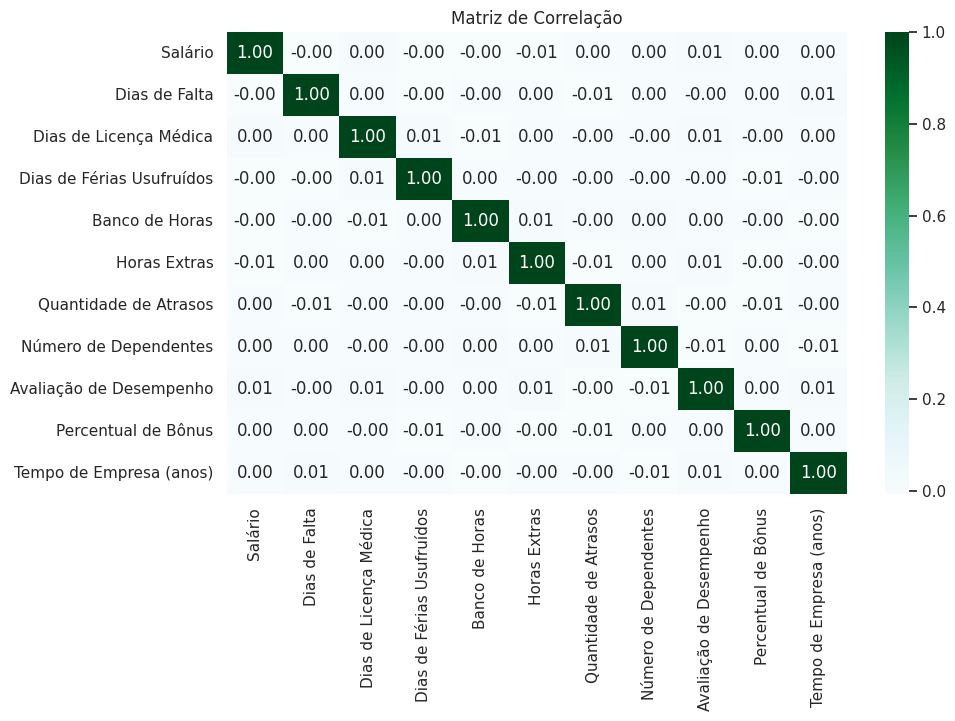

In [121]:
#Matriz de Correla√ß√£o para sal√°rio
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="BuGn", fmt=".2f")
plt.title("Matriz de Correla√ß√£o")
plt.show()


Neste caso, como podemos observar n√£o h√° vari√°vel que representa alguma rela√ß√£o com sal√°rio

###Sal√°rio x N√≠vel de Escolaridade

Existe alguma rela√ß√£o entre sal√°rios e n√≠vel de escolaridade?

In [100]:
df.groupby("Cargo")["Sal√°rio"].mean().sort_values(ascending=False)
df.groupby("Departamento")["Sal√°rio"].mean().sort_values(ascending=False)
df.groupby("N√≠vel de Escolaridade")["Sal√°rio"].mean().sort_values(ascending=False)


N√≠vel de Escolaridade
Doutorado       6068.098570
Mestrado        6025.504361
Gradua√ß√£o       6006.565965
Ensino M√©dio    5992.118622
Name: Sal√°rio, dtype: float64

Como podemos observar, maior escolaridade tem um peso muito pequeno em rela√ß√£o ao valor de sal√°rios. Contudo, observamos que existe sim um valor maior de sal√°rio atrelado ao maior n√≠vel de escolaridade, embora as diferen√ßas sejam muito pequenas.

In [16]:
#verificar quantas pessoas h√° por cateogria
df["N√≠vel de Escolaridade"].value_counts()

N√≠vel de Escolaridade
Gradua√ß√£o       25049
Ensino M√©dio    14995
Mestrado         7383
Doutorado        2573
Name: count, dtype: int64

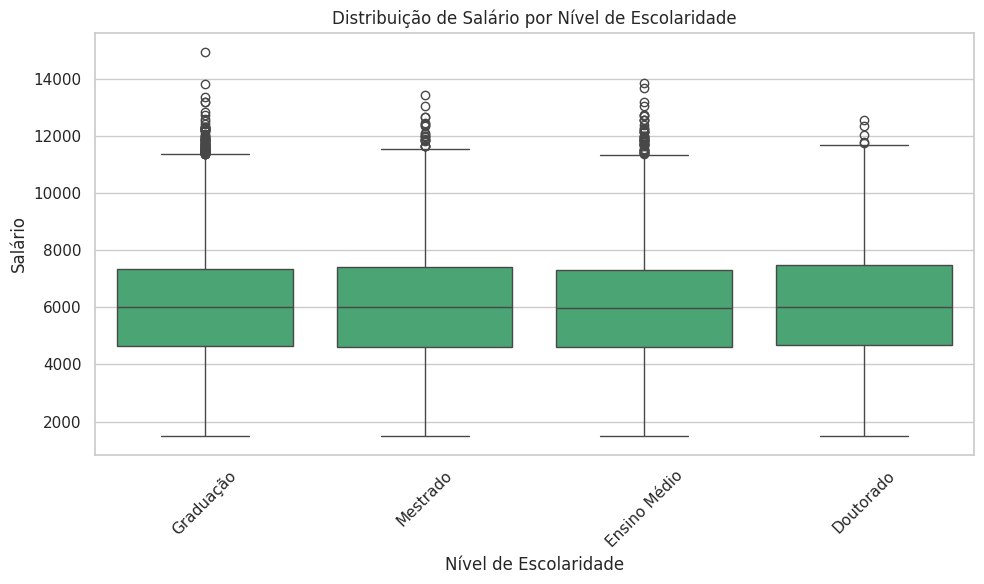

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="N√≠vel de Escolaridade", y="Sal√°rio", color="mediumseagreen")
plt.title("Distribui√ß√£o de Sal√°rio por N√≠vel de Escolaridade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Apesar de os valores n√£o variarem tanto assim, h√° uma tend√™ncia crescente: quanto **maior** o n√≠vel de escolaridade, ligeiramente **maior** o sal√°rio **m√©dio**.

Mas o que chama aten√ß√£o aqui √©:

- **A diferen√ßa entre Ensino M√©dio e Doutorado √© pequena (menos de R$ 10.000)**

Isso pode indicar que:

- O sal√°rio na empresa n√£o depende fortemente da escolaridade;

- Ou que os cargos com maiores sal√°rios n√£o exigem necessariamente maior forma√ß√£o;

- Ou ainda que como h√° poucas pessoas com Doutorado/Mestrado, a m√©dia e correla√ß√£o acabam ficando distorcidas;

###Sal√°rio x Departamento

Vamos verificar se a distribui√ß√£o de sal√°rios por departameto possui alguma tend√™ncia

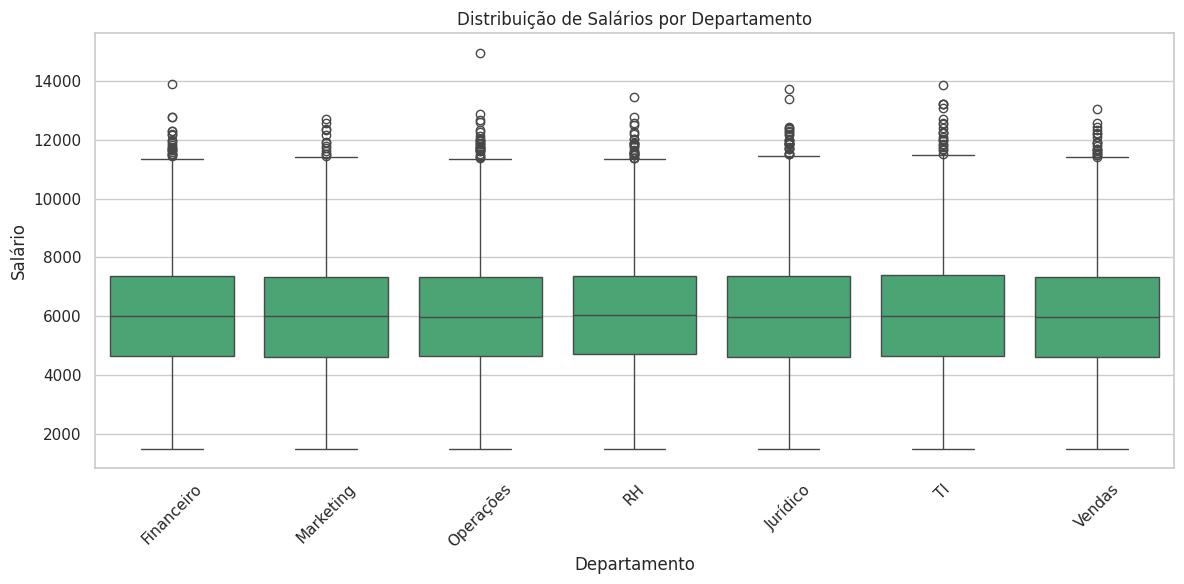

In [119]:
#Comparativo de Sal√°rio por Departamento
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Departamento", y="Sal√°rio", color="mediumseagreen")
plt.xticks(rotation=45)
plt.title("Distribui√ß√£o de Sal√°rios por Departamento")
plt.tight_layout()
plt.show()


A distribui√ß√£o de sal√°rio parece bastante similar entre os departamentos ‚Äî as medianas est√£o todas na mesma faixa, assim como os quartis.

Os outliers indicam algumas pessoas com sal√°rios mais altos, que aparecem em todos os departamentos, mas a estrutura geral da distribui√ß√£o √© parecida.

Portanto os sal√°rios est√£o distribu√≠dos de forma bastante homog√™nea entre os departamentos. N√£o h√° um departamento com sal√°rios visivelmente mais altos ou mais baixos na m√©dia ou na mediana.

###Sal√°rio X G√™nero

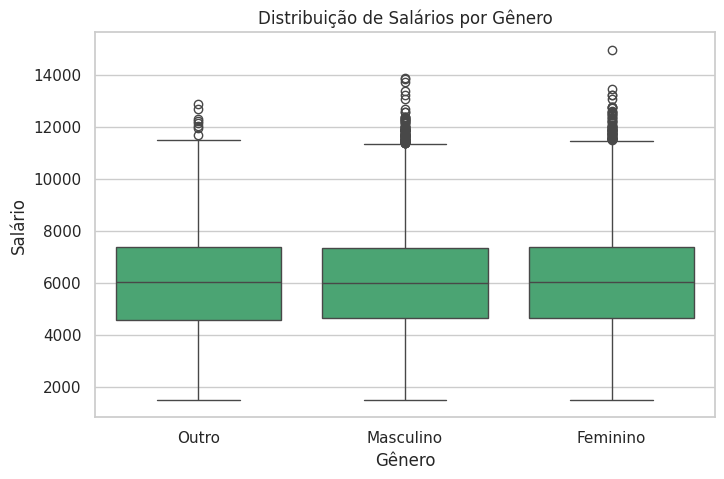

In [120]:
#Comparativo de Sal√°rio com Genero

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="G√™nero", y="Sal√°rio", color="mediumseagreen")
plt.title("Distribui√ß√£o de Sal√°rios por G√™nero")
plt.show()

Aqui tamb√©m podemos observar uma distribui√ß√£o de sal√°rios homogenea entre os generos.

##Taxa de Rotatividade

Nesta etapa, analisaremos a sa√≠da de colaboradores da empresa. Entender a rotatividade para ajudar a identificar se os funcion√°rios est√£o ficando por pouco tempo, quais √°reas perdem mais pessoas e se h√° alguma rela√ß√£o com o desempenho ou sal√°rios.

O objetivo √© descobrir:

- Qual √© a taxa de rotatividade geral.

- Quais departamentos ou gestores t√™m mais sa√≠das.

- Se existe algum padr√£o entre demiss√µes, desempenho e promo√ß√µes.

Dessa forma, poderemos entender e pensar em formas de melhorar a reten√ß√£o dos times.

###Rotatividade

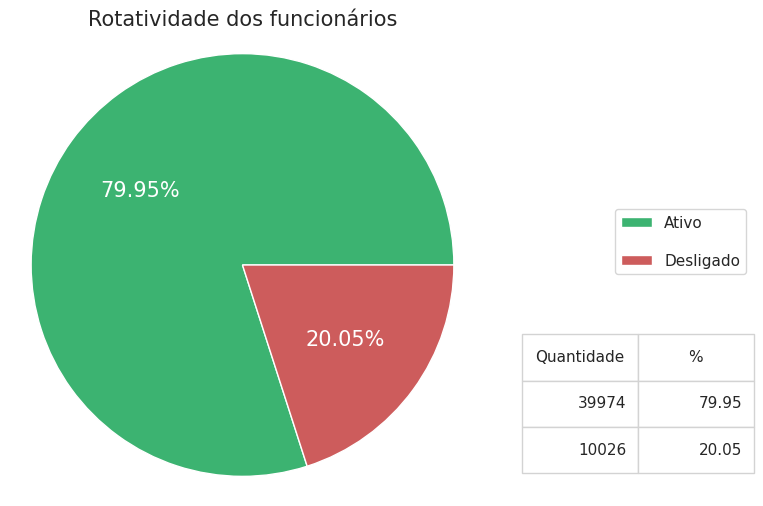

In [144]:
#Calcular as estat√≠sticas no DataFrame para a vari√°vel 'Rotatividade'
df_00 = df['Est√° Ativo'].value_counts()
df_00_perc = df_00 / df_00.sum() * 100
rotatividade = pd.DataFrame({'Qtde': df_00, '%': df_00_perc})

#Criar gr√°fico de pizza
fig, ax = plt.subplots(figsize=(6, 6))
colors = ['mediumseagreen', 'indianred']

#Capturar os textos do gr√°fico de pizza
wedges, texts, autotexts = ax.pie(
    rotatividade['%'], labels=None, autopct='%0.2f%%', colors=colors, textprops={'fontsize': 15})

#Alterar a cor da fonte dos r√≥tulos de autopreenchimento para branco
for autotext in autotexts:
    autotext.set_color('white')

#Adicionar legendas
legendas = ['Ativo', 'Desligado']
ax.legend(legendas, loc='right', labelspacing=1.5,
          bbox_to_anchor=(1.0, 0.1, 0.6, 0.9))

#Adicionar tabela
cell_text = rotatividade.apply(
    lambda x: [f'{int(x["Qtde"]):.0f}', f'{x["%"]:.2f}'], axis=1).tolist()
tabela = plt.table(cellText=cell_text, colLabels=[
                   'Quantidade', '%'], loc='bottom right', bbox=(1.1, 0.05, 0.5, 0.3))
tabela.auto_set_font_size(False)
tabela.set_fontsize(11)

#Alterar a cor da grade da tabela
for key, cell in tabela.get_celld().items():
    cell.set_edgecolor('lightgrey')

#Ajustar layout
plt.axis('equal')

#Adicionar t√≠tulo
plt.title('Rotatividade dos funcion√°rios', fontsize=15)

#Exibindo o gr√°fico
plt.show()

Observa-se que, dos 50000 funcion√°rios, 10026 (aproximadamente 20.05%) n√£o fazem mais parte do quadro de colaboradores. A base analisada n√£o informa o motivo do desligamento, ou seja, n√£o √© poss√≠vel saber se foi uma decis√£o do pr√≥prio colaborador ou da empresa.

###Distribui√ß√£o de tempo de empresa e taxa de rotatividade

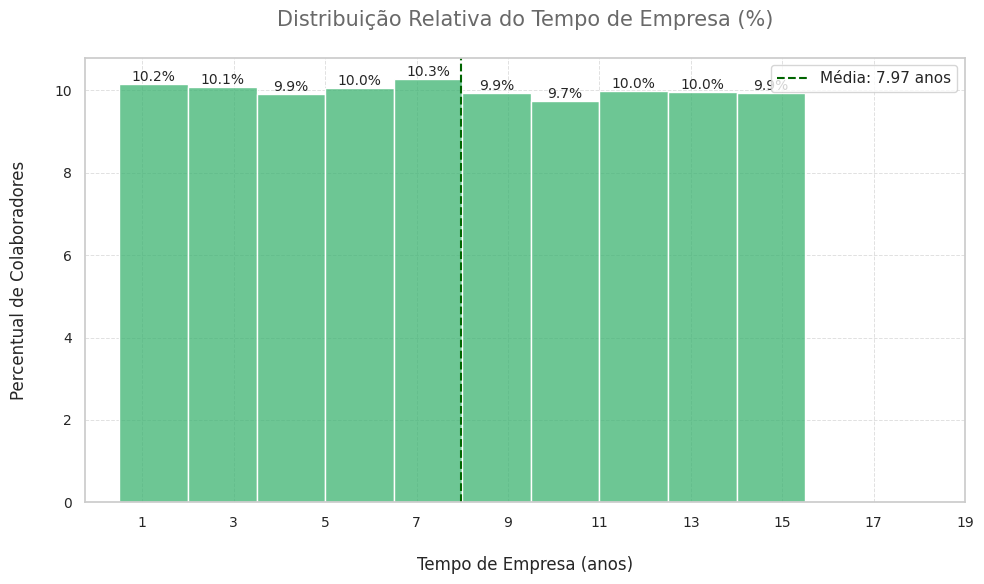

In [104]:
#Total de funcion√°rios
total_funcionarios = len(df)

#Criar o histograma com (percentual)
plt.figure(figsize=(10, 6))
plot = sns.histplot(
    data=df,
    x='Tempo de Empresa (anos)',
    bins=10,
    stat='percent',
    kde=False,
    color='mediumseagreen'
)

#Adicionar o percentual sobre as barras
for p in plot.patches:
    altura = p.get_height()
    plot.annotate(f'{altura:.1f}%',
                  (p.get_x() + p.get_width() / 2., altura),
                  ha='center', va='bottom', fontsize=10)

#Linha m√©dia
media_tempo = df['Tempo de Empresa (anos)'].mean()
plt.axvline(x=media_tempo, color='darkgreen', linestyle='--', label=f'M√©dia: {media_tempo:.2f} anos')

#T√≠tulos e eixos
plot.set_title('Distribui√ß√£o Relativa do Tempo de Empresa (%)\n', fontsize=15, color='dimgray')
plot.set(xlabel='\nTempo de Empresa (anos)', ylabel='Percentual de Colaboradores\n')
plot.tick_params(axis='both', labelsize=10)
plt.xticks(range(1, 20, 2))

#Grade e legenda
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
plt.show()

Podemos identificar que a m√©dia de perman√™ncia dos colaboradores √© em torno de **8 anos**.

- Embora a distribui√ß√£o tamb√©m seja homogenea, podemos observar que a maior concentra√ß√£o de colaboradores possui entre 6 e 8 anos;

Rotatividade por Tempo de Empresa

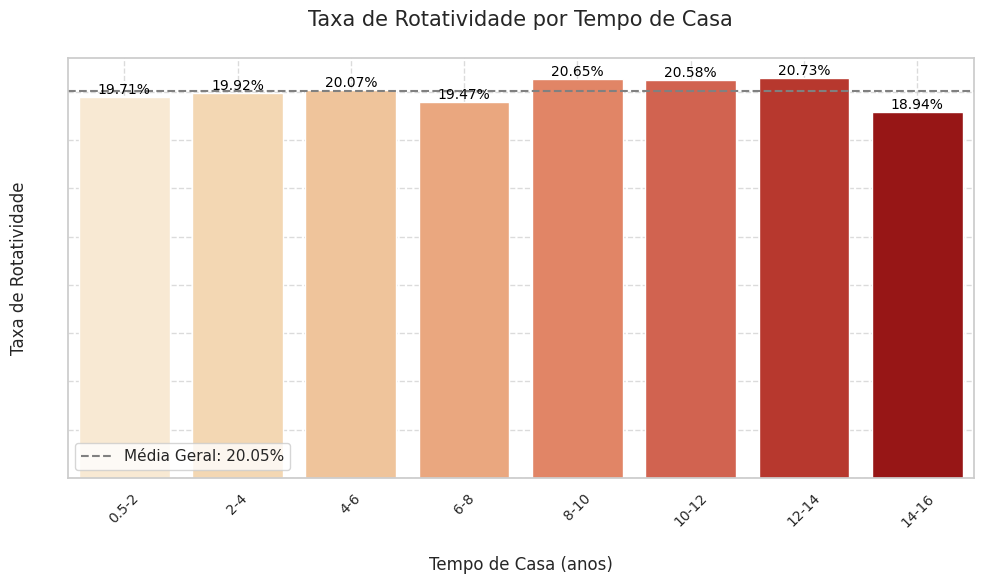

In [112]:
#Colunas no formato correto
df['Tempo de Empresa (anos)'] = pd.to_numeric(df['Tempo de Empresa (anos)'], errors='coerce')
df['Est√° Ativo'] = df['Est√° Ativo'].str.strip().str.title()  # Corrigir poss√≠veis espa√ßos/capitaliza√ß√£o

#Converter para bin√°rio: 1 = ainda na empresa, 0 = saiu
df['AtivoBin'] = df['Est√° Ativo'].map({'Sim': 1, 'N√£o': 0})

#Faixas de Tempo de Empresa - iniciar em 0.5 para n√£o ter faixa zerada
bins = [0.5, 2, 4, 6, 8, 10, 12, 14, 16]
labels = ['0.5-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16']
df['FaixaTempo'] = pd.cut(df['Tempo de Empresa (anos)'], bins=bins, labels=labels, right=False)

#Calcular a taxa de rotatividade: 1 - m√©dia de quem ficou
rotatividade_por_tempo = 1 - df.groupby('FaixaTempo')['AtivoBin'].mean()

#Plotar o gr√°fico
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=rotatividade_por_tempo.index.astype(str),
                   y=rotatividade_por_tempo.values, palette='OrRd')

#T√≠tulo e eixos
plot.set_title('Taxa de Rotatividade por Tempo de Casa\n', fontsize=15)
plot.set(xlabel='\nTempo de Casa (anos)', ylabel='Taxa de Rotatividade\n')
plot.tick_params(axis='both', labelsize=10)

#Linha da m√©dia geral
rotatividade_media = 1 - df['AtivoBin'].mean()
plt.axhline(rotatividade_media, color='gray', linestyle='--',
            label=f'M√©dia Geral: {rotatividade_media:.2%}')

#Anotar valores nas barras
for p in plot.patches:
    height = p.get_height()
    if not pd.isna(height):
        plot.annotate(f'{height:.2%}',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', fontsize=10, color='black')


plot.set_yticklabels([])
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


A rotatividade permanece relativamente constante, as barras indicam que a rotatividade √© bem pr√≥xima entre as faixas. Isso mostra que o percentual de sa√≠da n√£o varia muito com o tempo de casa.

- Enocntramos uma leve queda na faixa **14-16 anos**, tem a menor taxa**18,94%** que pode indicar que quem chega a essa senioridade tende a ficar mais;

- A maior rotatividade aparece na faixa 12-14 anos com **20,73%**, mas a diferen√ßa √© bem pequena, s√≥ uns 2 pontos percentuais acima da m√©dia geral;

- A m√©dia geral est√° em **20,05%** mostrando que a rotatividade geral da empresa est√° em torno de 20%;

###Rotatividade x Genero

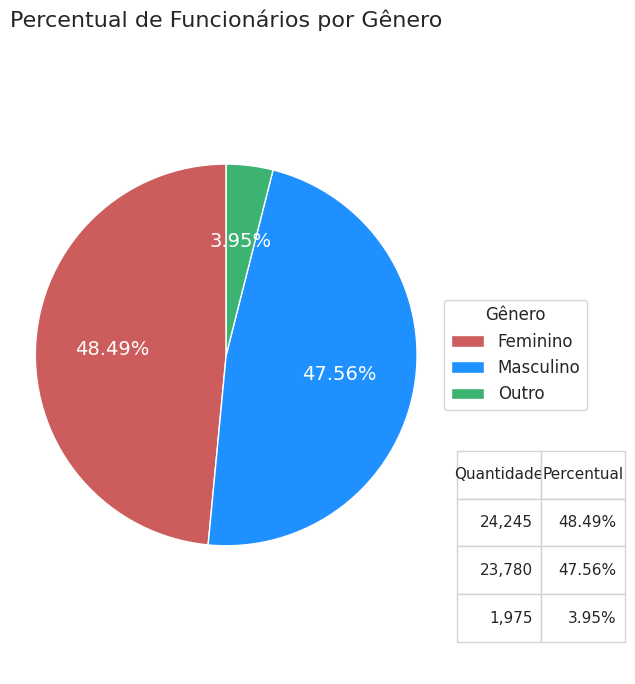

In [113]:
#Contagem e percentual por g√™nero no df
contagem_genero = df['G√™nero'].value_counts()
percentual_genero = contagem_genero / contagem_genero.sum() * 100

funcionarios_por_genero = pd.DataFrame({'Quantidade': contagem_genero, 'Percentual': percentual_genero})

#Definir cores para as tr√™s categorias
cores = ['indianred', 'dodgerblue', 'mediumseagreen']

fig, ax = plt.subplots(figsize=(7,7))

#Gr√°fico de pizza
wedges, texts, autotexts = ax.pie(
    funcionarios_por_genero['Percentual'], labels=None, autopct='%0.2f%%', colors=cores,
    textprops={'fontsize': 14}, startangle=90)

#Valores dentro da pizza
for autotext in autotexts:
    autotext.set_color('white')

#Legendas
ax.legend(funcionarios_por_genero.index, loc='center left', bbox_to_anchor=(1, 0.5),
          fontsize=12, title='G√™nero')

#Criar tabela com a contagem e percentual
cell_text = funcionarios_por_genero.apply(
    lambda x: [f'{int(x["Quantidade"]):,}', f'{x["Percentual"]:.2f}%'], axis=1).tolist()

tabela = plt.table(cellText=cell_text, colLabels=['Quantidade', 'Percentual'],
                   loc='bottom right', bbox=(1.05, 0.05, 0.4, 0.3))

tabela.auto_set_font_size(False)
tabela.set_fontsize(11)

#Ajustes visuais da tabela
for key, cell in tabela.get_celld().items():
    cell.set_edgecolor('lightgrey')

plt.axis('equal')  # mant√©m o c√≠rculo perfeito
plt.title('Percentual de Funcion√°rios por G√™nero', fontsize=16)

plt.tight_layout()
plt.show()

Observa-se uma predomin√¢ncia de colaboradores do g√™nero feminino, representando **48.48%**, enquanto os colaboradores do g√™nero masculino representam **47.56%**. Entretanto h√° uma minoria de outros generos, com apenas **3.95%**.

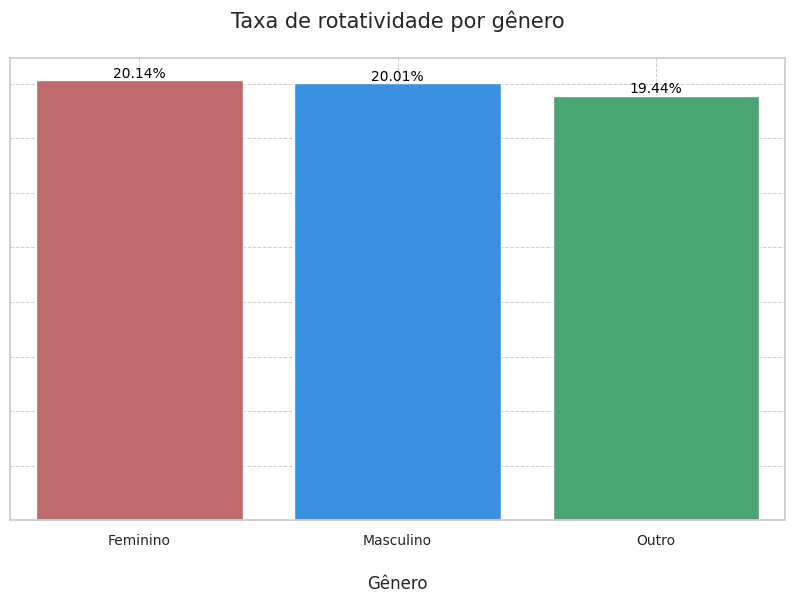

In [114]:
#Calcular a taxa de rotatividade por g√™nero
rotatividade_por_genero = df.groupby('G√™nero')['AtivoBin'].apply(lambda x: 1 - x.mean())

#Cores
cores = ['indianred', 'dodgerblue', 'mediumseagreen']

plt.figure(figsize=(10, 6))
plot = sns.barplot(x=rotatividade_por_genero.index,
                   y=rotatividade_por_genero.values,
                   palette=cores)

#Adicionar t√≠tulo e r√≥tulos
plot.set_title('Taxa de rotatividade por g√™nero\n', fontsize=15)
plot.set(xlabel='\nG√™nero', ylabel='')
plot.tick_params(axis='both', labelsize=10)

#Adicionar valores percentuais sobre as barras
for p in plot.patches:
    height = p.get_height()
    plot.annotate(f'{height:.2%}',
                  (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='bottom', fontsize=10, color='black')

#Remover valores do eixo y
plot.set_yticklabels([])

#Formatar grade do gr√°fico
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.show()


Assim como na quantidade de funcion√°rios do g√™nero feminino e masculino possu√≠rem pouca diferen√ßa, a homogenidade se mant√©m na taxa de rotatividade tamb√©m. Contudo, devemos observar o √≠ndice de rotatividade de colaboradores com g√™nero "outros" uma vez que representam a menor faixa da quantidade total de colaboradores e possuem uma taxa de rotatividade na mesma propor√ß√£o que os outros.

###Cargo x taxa de rotatividade

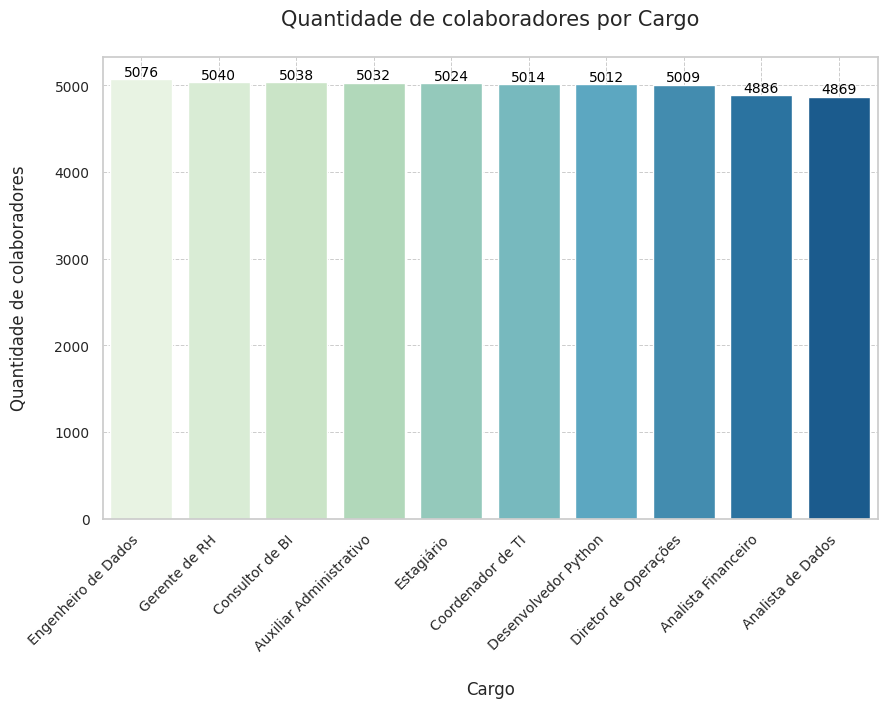

In [128]:
#Calcular a quantidade de colaboradores por Cargo
funcionarios_por_cargo = df['Cargo'].value_counts()

#Criar o gr√°fico de barras
plt.figure(figsize=(10, 6))
plot = sns.barplot(
    x=funcionarios_por_cargo.index,
    y=funcionarios_por_cargo.values,
    palette='GnBu'
)

#Adicionar r√≥tulos e t√≠tulo
plot.set_title('Quantidade de colaboradores por Cargo\n', fontsize=15)
plot.set(xlabel='\nCargo', ylabel='Quantidade de colaboradores\n')
plot.tick_params(axis='both', labelsize=10)

#Rotacionando os valores do eixo x
plt.xticks(rotation=45, ha='right')

#Adicionar valores sobre as barras
for p in plot.patches:
    plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', fontsize=10, color='black')

#Formatando grade do gr√°fico
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.show()

As fun√ß√µes de Engenheiro de Dados e Gerente de RH, representam os cargos com maior volume de colaboradores na posi√ß√£o.
Embora consideramos uma hegemonia com pouca diferen√ßa entre os cargos.

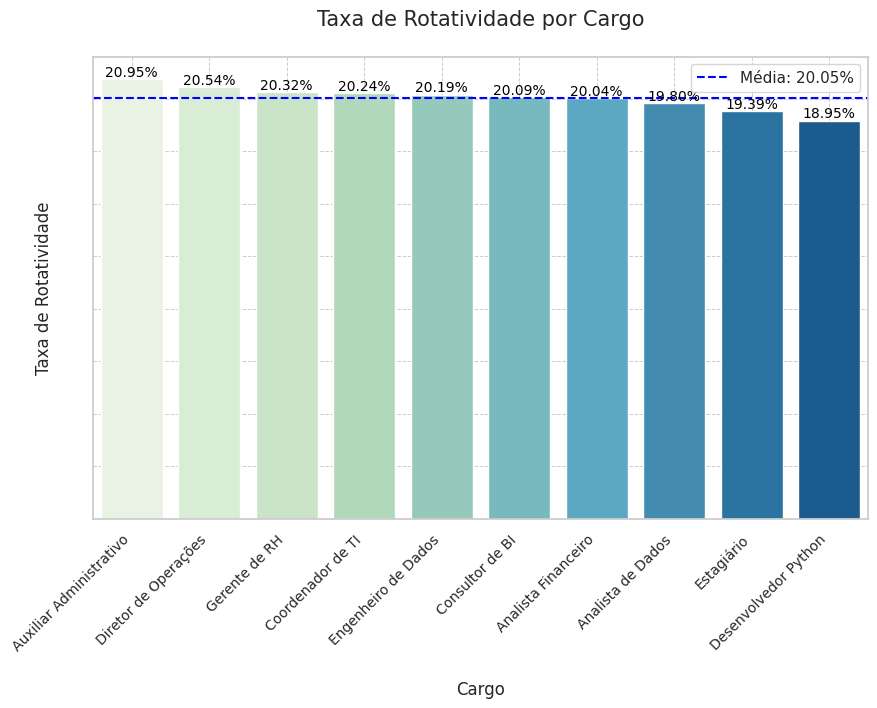

In [131]:
# Calcular a taxa de rotatividade por cargo
rotatividade_por_cargo = 1 - df.groupby('Cargo')['AtivoBin'].mean()
rotatividade_por_cargo = rotatividade_por_cargo.sort_values(ascending=False)

# Criar o gr√°fico de barras
plt.figure(figsize=(10, 6))
plot = sns.barplot(
    x=rotatividade_por_cargo.index,
    y=rotatividade_por_cargo.values,
    palette='GnBu'
)

# Adicionar r√≥tulos e t√≠tulo
plot.set_title('Taxa de Rotatividade por Cargo\n', fontsize=15)
plot.set(xlabel='\nCargo', ylabel='Taxa de Rotatividade\n')
plot.tick_params(axis='both', labelsize=10)

# Adicionando linha horizontal para a m√©dia geral
rotatividade_media = 1 - df['AtivoBin'].mean()
plt.axhline(rotatividade_media, color='blue', linestyle='--',
            label=f'M√©dia: {rotatividade_media:.2%}')

# Removendo os valores do eixo y
plot.set_yticklabels([])

# Rotacionando os valores do eixo x
plt.xticks(rotation=45, ha='right')

# Adicionar valores sobre as barras
for p in plot.patches:
    plot.annotate(f'{p.get_height():.2%}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', fontsize=10, color='black')

# Formatando grade do gr√°fico
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Adicionando a legenda
plt.legend()

# Exibindo o gr√°fico
plt.show()


Considerando a m√©dia de rotatividade de **20.05%**, o cargo com a maior rotatividade √© o de Auxiliar Administrativo, enquanto o de menor rotatividade √© o de Desenvolvedor Python.

###Distribui√ß√£o de sal√°rio e taxa de rotatividade

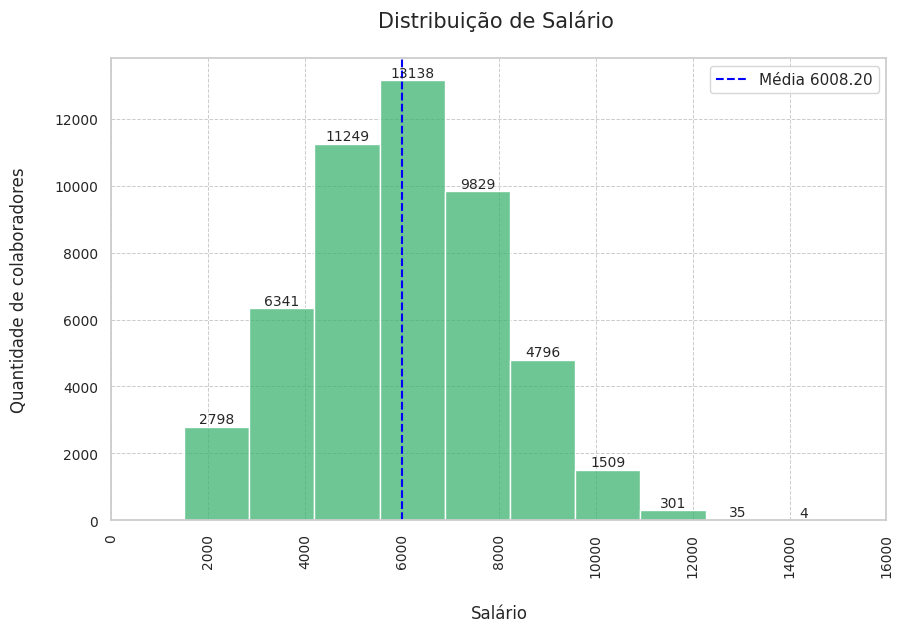

In [135]:
#Criar o gr√°fico histograma
plt.subplots(figsize=(10, 6))
plot = sns.histplot(data=df, x='Sal√°rio',
                    bins=10, kde=False, color='mediumseagreen')

#Adicionando frequ√™ncia sobre as barras
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', (
        p.get_x() + p.get_width() / 2., p.get_height()
    ), ha='center', va='bottom', fontsize=10)

#Adicionando linha vertical para a m√©dia
renda_media = df['Sal√°rio'].mean()
plt.axvline(x=renda_media, color='blue', linestyle='--',
            label=f'M√©dia {renda_media:.2f}')

#Adicionando e formatando r√≥tulos e t√≠tulo
plot.set_title('Distribui√ß√£o de Sal√°rio \n', fontsize=15)
plot.set(xlabel='\nSal√°rio', ylabel='Quantidade de colaboradores\n')
plot.tick_params(axis='both', labelsize=10)

#Obter valores m√≠nimo e m√°ximo reais do sal√°rio
sal_min = int(df['Sal√°rio'].min())
sal_max = int(df['Sal√°rio'].max())

#Definir um passo de intervalo
intervalo = 2000

#Gerar os ticks do eixo X
ticks = list(range(sal_min - sal_min % intervalo, sal_max + intervalo, intervalo))
plt.xticks(ticks, rotation=90, ha='center')

#Rotacionando os valores do eixo x
plt.xticks(rotation=90, ha='center')

#Formatando grade do gr√°fico
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

#Adicionando a legenda
plt.legend()

#Exibindo o gr√°fico
plt.show()

A distribui√ß√£o tem um formato assim√©trico √† direita, identificando que a maioria dos colaboradores est√° concentrada nos sal√°rios mais baixos, e existe uma cauda longa para sal√°rios mais altos.

A M√©dia Salarial √©** R$ 6008,20**, e a faixa com maior quantidade de colaboradores **~13 mil** est√° entre aproximadamente **5.000** e** 6.000** reais concentrando a maioria da for√ßa de trabalho.

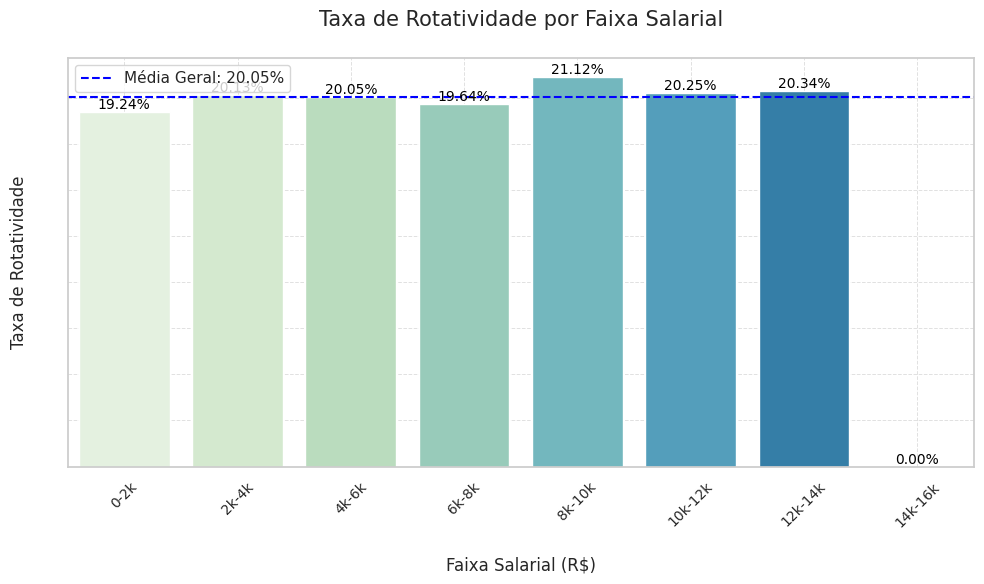

In [137]:
#Criar faixas de sal√°rio baseadas no histograma real
bins_salario = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000]
labels_salario = ['0-2k', '2k-4k', '4k-6k', '6k-8k', '8k-10k', '10k-12k', '12k-14k', '14k-16k']
df['FaixaSalarial'] = pd.cut(df['Sal√°rio'], bins=bins_salario, labels=labels_salario, right=False)

#Calcular rotatividade correta (quem saiu = 1 - m√©dia de quem ficou)
rotatividade_por_renda = 1 - df.groupby('FaixaSalarial')['AtivoBin'].mean()

#Criar gr√°fico de barras
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=rotatividade_por_renda.index.astype(str),
                   y=rotatividade_por_renda.values,
                   palette='GnBu')

#Adicionar t√≠tulo, r√≥tulos e estilo
plot.set_title('Taxa de Rotatividade por Faixa Salarial\n', fontsize=15)
plot.set(xlabel='\nFaixa Salarial (R$)', ylabel='Taxa de Rotatividade\n')
plot.tick_params(axis='both', labelsize=10)

#Linha da m√©dia geral
rotatividade_media = 1 - df['AtivoBin'].mean()
plt.axhline(rotatividade_media, color='blue', linestyle='--',
            label=f'M√©dia Geral: {rotatividade_media:.2%}')

#Anotar valores sobre as barras
for p in plot.patches:
    height = p.get_height()
    if not pd.isna(height):
        plot.annotate(f'{height:.2%}',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', fontsize=10, color='black')


plot.set_yticklabels([])
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

A m√©dia geral de rotatividade est√° em **20,05%**.

Podemos observar taixas de rotatividade abaixo da m√©dia nas faixas salariais mais baixas.

A faixa 14k- 16k representa a menor taixa de rotatividade, mas devemos levar em considera√ß√£o a amostra dessa faixa era muito pequena em compara√ß√£o as outras faixas.


###Avalia√ß√£o de performance/desempenho no trabalho e taxa de rotatividade

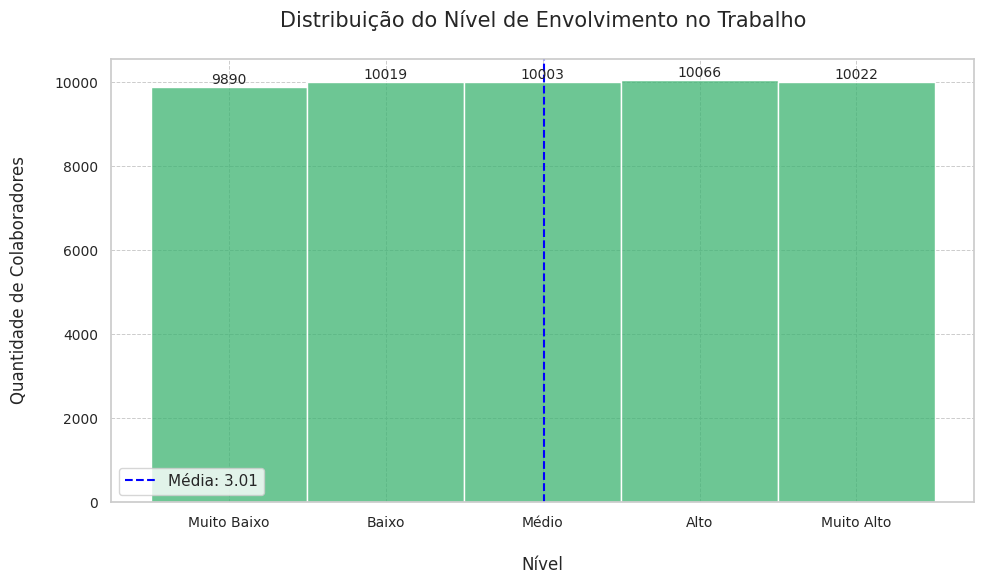

In [139]:
plt.subplots(figsize=(10, 6))
plot = sns.histplot(
    data=df,
    x='Avalia√ß√£o de Desempenho',
    bins=5,
    binrange=(0.5, 5.5),
    kde=False,
    color='mediumseagreen'
)

#Frequ√™ncia sobre as barras
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', fontsize=10)

#Linha da m√©dia
envolvimento_media = df['Avalia√ß√£o de Desempenho'].mean()
plt.axvline(x=envolvimento_media, color='blue', linestyle='--',
            label=f'M√©dia: {envolvimento_media:.2f}')

#T√≠tulo e r√≥tulos
plot.set_title('Distribui√ß√£o do N√≠vel de Envolvimento no Trabalho\n', fontsize=15)
plot.set(xlabel='\nN√≠vel', ylabel='Quantidade de Colaboradores\n')
plot.tick_params(axis='both', labelsize=10)

#Ajustar r√≥tulos do eixo X
plt.xticks([1, 2, 3, 4, 5])
plot.set_xticklabels(['Muito Baixo', 'Baixo', 'M√©dio', 'Alto', 'Muito Alto'])

#Grade, legenda e exibi√ß√£o
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()


Observamos novamente uma distribui√ß√£o bastante equilibrada. Todas as categorias t√™m aproximadamente **10 mil** colaboradores. A mais baixa **‚ÄúMuito Baixo‚Äù (1)**, tem 9.890 e a mais alta **‚ÄúAlto‚Äù (4)** tem 10.066.

Sugerindo uniformidade no processo de avalia√ß√£o. Seria interessante encontrarmos mais formas de analisar a performance do colaborador e entender se a avalia√ß√£o est√° sendo justa e criteriosa.


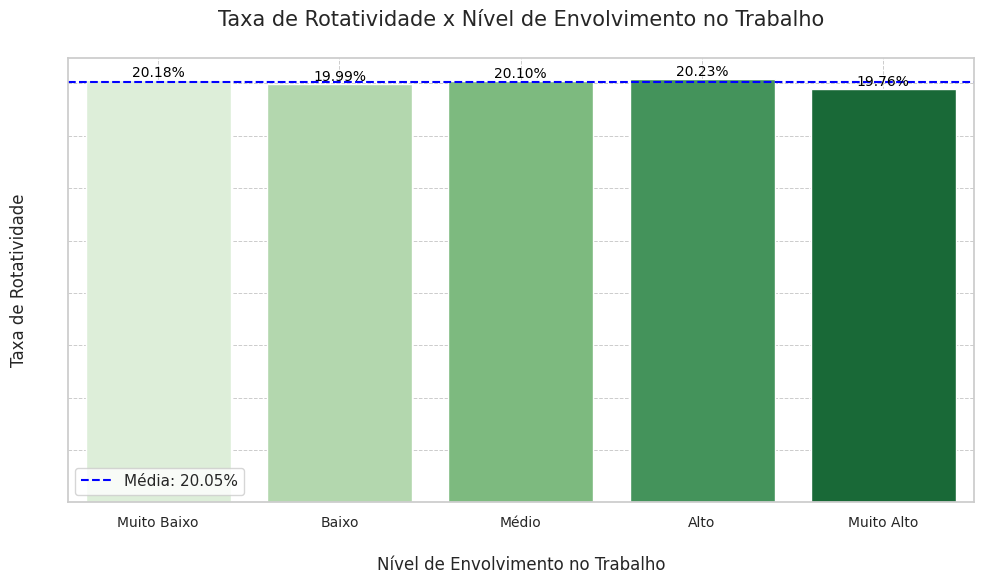

In [141]:
#Taxa de rotatividade
rotatividade_x_trabalho_vida = 1 - df.groupby('Avalia√ß√£o de Desempenho')['AtivoBin'].mean()

#criar o gr√°fico de barras
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=rotatividade_x_trabalho_vida.index,
                   y=rotatividade_x_trabalho_vida.values,
                   palette='Greens')  # paleta verde

#Adicionar r√≥tulos e t√≠tulo
plot.set_title('Taxa de Rotatividade x N√≠vel de Envolvimento no Trabalho\n', fontsize=15)
plot.set(xlabel='\nN√≠vel de Envolvimento no Trabalho', ylabel='Taxa de Rotatividade\n')
plot.tick_params(axis='both', labelsize=10)

#Linha da m√©dia geral de rotatividade
rotatividade_media = 1 - df['AtivoBin'].mean()
plt.axhline(rotatividade_media, color='blue', linestyle='--',
            label=f'M√©dia: {rotatividade_media:.2%}')

#Adicionar valores sobre as barras
for p in plot.patches:
    height = p.get_height()
    if not pd.isna(height):
        plot.annotate(f'{height:.2%}',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', fontsize=10, color='black')

#Limpar y-ticks e renomear x-ticks
plot.set_yticklabels([])
plot.set_xticklabels(['Muito Baixo', 'Baixo', 'M√©dio', 'Alto', 'Muito Alto'])

#Grade e legenda
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()


A taxa de rotatividade se mant√©m uniforme dentre os n√≠veis de avalia√ß√£o.
Demonstrando que talvez a "Avalia√ß√£o de Desempenho" n√£o seja um crit√©rio para desligamento.

##Demiss√µes ao longo do tempo
Nesta etapa da an√°lise, buscamos compreender o perfil e o comportamento das demiss√µes dentro da organiza√ß√£o. Considerando que aproximadamente 20% dos colaboradores n√£o est√£o mais ativos, √© fundamental investigar como essa rotatividade se distribui ao longo do tempo de empresa e entre diferentes grupos.

A an√°lise foca em identificar tend√™ncias, padr√µes de sa√≠da e poss√≠veis fatores associados ao desligamento, como o tempo de casa, departamento, g√™nero e avalia√ß√£o de desempenho. Esses dados s√£o essenciais para compreender os riscos de perda de talentos e orientar estrat√©gias mais eficazes de reten√ß√£o.

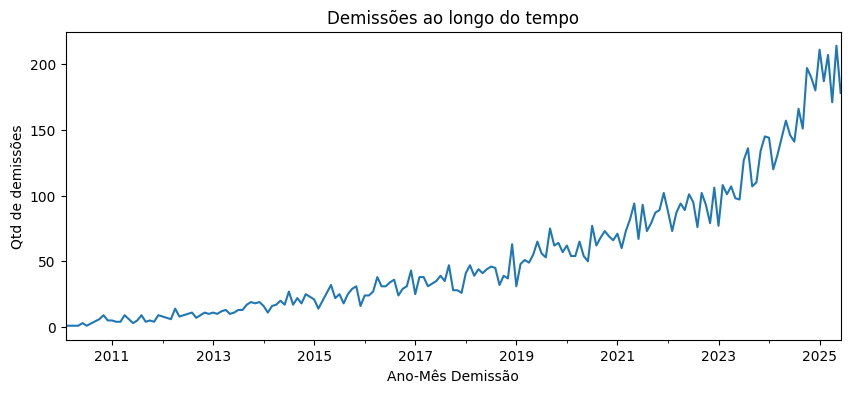

In [41]:

df['Data de Demiss√£o'] = pd.to_datetime(df['Data de Demiss√£o'], errors='coerce')
df['Ano-M√™s Demiss√£o'] = df['Data de Demiss√£o'].dt.to_period('M')

demissoes_por_mes = df.dropna(subset=['Data de Demiss√£o'])['Ano-M√™s Demiss√£o'].value_counts().sort_index()

demissoes_por_mes.plot(kind='line', title='Demiss√µes ao longo do tempo', figsize=(10,4))
plt.ylabel('Qtd de demiss√µes')
plt.show()



Podemos observar uma tend√™ncia clara de crescimento de demiss√µes ao longo dos anos, o que pode significar tamb√©m um aumento no quadro de funcion√°rios.

Vamos observar o crescimento da empresa com a an√°lise de admiss√µes.

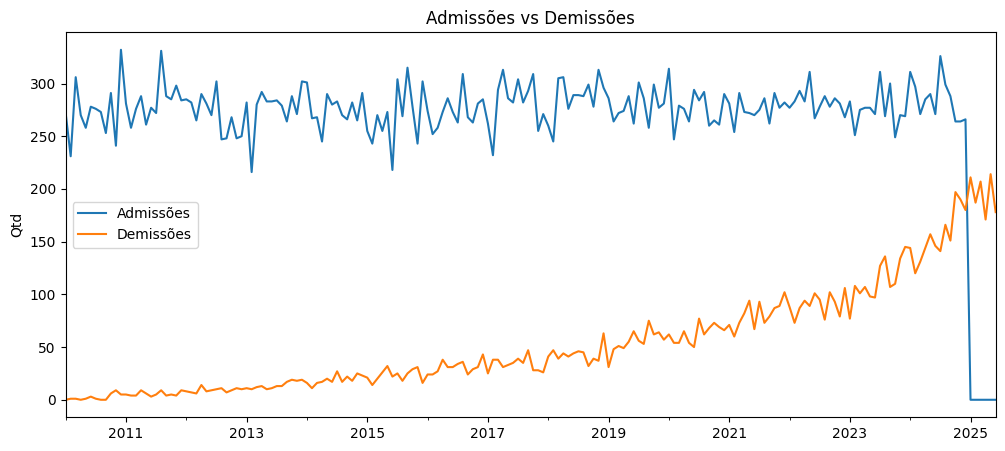

In [46]:
df['Data de Admiss√£o'] = pd.to_datetime(df['Data de Admiss√£o'], errors='coerce')
df['Ano-M√™s Admiss√£o'] = df['Data de Admiss√£o'].dt.to_period('M')

admissoes = df['Ano-M√™s Admiss√£o'].value_counts().sort_index()
demissoes = df['Ano-M√™s Demiss√£o'].value_counts().sort_index()

# Unir em um dataframe
fluxo = pd.DataFrame({
    'Admiss√µes': admissoes,
    'Demiss√µes': demissoes
}).fillna(0)

fluxo.plot(title='Admiss√µes vs Demiss√µes', figsize=(12,5))
plt.ylabel('Qtd')
plt.show()


Ao compararmos o n√∫mero de admiss√µes com demiss√µes, percebemos que o n√∫mero de admiss√µes mant√™m um volume alto e relativamente est√°vel desde 2010 at√© o in√≠cio de 2024.

No entanto, h√° uma queda abrupta no final da s√©rie temporal (2025), chegando praticamente a zero e observando diretamente a base, podemos identificar que s√≥ temos valores de admiss√£o at√© Dez/2024. Seria necess√°rio entender e verificar a captura destes para analisar esse per√≠odo.

Em demiss√µes podemos observar uma tend√™ncia clara de crescimento, saindo de valores pr√≥ximos a zero em 2010 e ultrapassando 200 por m√™s em 2025. A curva √© ascendente e constante, indicando aumento na rotatividade, especialmente acentuado a partir de 2020.

Apesar da empresa continuar contratando em volume elevado, as demiss√µes cresceram muito mais nos √∫ltimos anos, o que indica aumento da rotatividade.

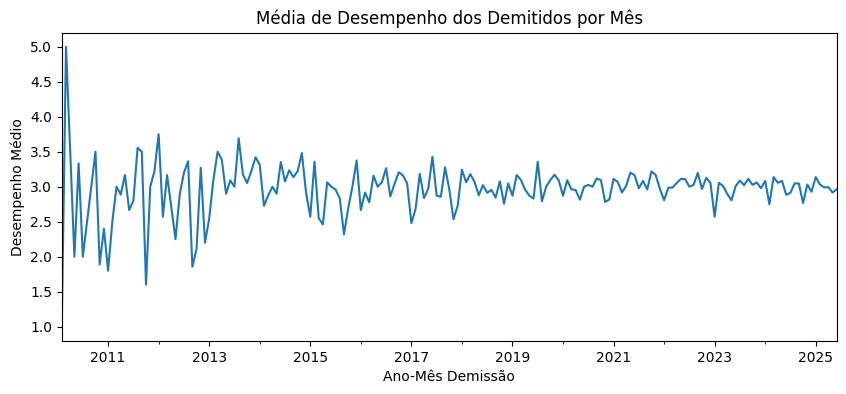

In [42]:
# S√≥ demitidos
df_demitidos = df[df['Data de Demiss√£o'].notna()]

# M√©dia de desempenho dos demitidos por m√™s
media_perf_demitidos = df_demitidos.groupby('Ano-M√™s Demiss√£o')['Avalia√ß√£o de Desempenho'].mean()

media_perf_demitidos.plot(kind='line', title='M√©dia de Desempenho dos Demitidos por M√™s', figsize=(10,4))
plt.ylabel('Desempenho M√©dio')
plt.show()

Observamos que a empresa passou a demitir mais colaboradores com desempenho m√©dio, n√£o necessariamente os de pior performance.

Isso pode indicar que o desempenho n√£o √© o √∫nico crit√©rio para desligamento, sugerindo influ√™ncia de outros fatores.

A estabilidade da linha nos √∫ltimos anos pode refletir processos mais padronizados de desligamento, mas sem foco exclusivo nos piores desempenhos.

N√£o observamos demiss√µes em colaboradores com alto desempenho ao longo dos anos.


###Tend√™ncia por departamento: quem est√° crescendo ou diminuindo?

In [65]:
admissoes_dep = df.groupby('Departamento')['Data de Admiss√£o'].count()
demissoes_dep = df['Departamento'][df['Data de Demiss√£o'].notna()].value_counts()

departamento_fluxo = pd.DataFrame({
    'Admiss√µes': admissoes_dep,
    'Demiss√µes': demissoes_dep
}).fillna(0)

departamento_fluxo['Saldo'] = departamento_fluxo['Admiss√µes'] - departamento_fluxo['Demiss√µes']
departamento_fluxo.sort_values('Saldo', ascending=False)

Admiss√µes  Demiss√µes  Saldo
Departamento                             
TI                 7240       1418   5822
RH                 7215       1447   5768
Opera√ß√µes          7122       1382   5740
Marketing          7170       1443   5727
Financeiro         7171       1455   5716
Vendas             7113       1465   5648
Jur√≠dico           6969       1416   5553

Todos os departamentos tiveram saldo positivo, ou seja, admitiram mais do que demitiram no per√≠odo analisado.

O departamento de **TI** foi o que mais cresceu, com **7.240** admiss√µes e um saldo de **+5.822** colaboradores.

O **Jur√≠dico** teve o menor saldo de crescimento, com **5.553**, embora ainda positivo.

As diferen√ßas entre os saldos s√£o relativamente pequenas, sugerindo que o crescimento foi bem distribu√≠do entre os departamentos.

Mesmo departamentos com n√∫mero elevado de demiss√µes, como Vendas e Financeiro, mantiveram saldo significativamente positivo, indicando expans√£o ou substitui√ß√£o planejada de pessoal.

O saldo positivo em todos os departamentos pode indicar tamb√©m uma rotatividade controlada, com maior foco em contrata√ß√µes do que cortes.

###Demiss√µes por gestor

In [142]:
#Agrupar por ID do Gestor e verificar o saldo
gestores_fluxo = df.groupby('ID do Gestor').agg({
    'Data de Admiss√£o': 'count',
    'Data de Demiss√£o': lambda x: x.notna().sum()
})

#Renomear colunas
gestores_fluxo.columns = ['Admissoes', 'Demissoes']

#Calcular propor√ß√£o (decimal)
gestores_fluxo['Proporcao'] = gestores_fluxo['Demissoes'] / gestores_fluxo['Admissoes']

#Calcular propor√ß√£o formatada como percentual (string)
gestores_fluxo['Proporcao (%)'] = (gestores_fluxo['Proporcao'] * 100).map('{:.2f}%'.format)

#Ordenar pela propor√ß√£o decimal
gestores_fluxo = gestores_fluxo.sort_values('Proporcao', ascending=False)

#Exibir
print(gestores_fluxo.head())

              Admissoes  Demissoes  Proporcao Proporcao (%)
ID do Gestor                                               
EMP_00445            51         21   0.411765        41.18%
EMP_00844            40         15   0.375000        37.50%
EMP_00324            65         24   0.369231        36.92%
EMP_00865            52         19   0.365385        36.54%
EMP_00851            47         17   0.361702        36.17%


A coluna "Admissoes" mostra quantas pessoas o gestor contratou.

A coluna "Demissoes" mostra quantas dessas pessoas foram desligadas.

A coluna "Proporcao" representa a taxa de desligamento sobre o total admitido. Por exemplo, um valor de 0.41 indica que 41% das admiss√µes feitas por esse gestor resultaram em demiss√£o.

O volume de gestores √© muito grande para avaliarmos apenas desta forma, iremos agrup√°-los por faixa de Taxa de Rotatividade.

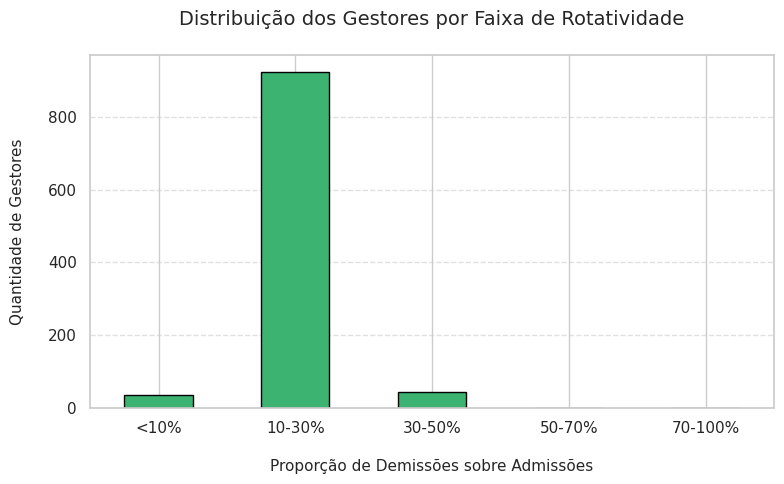

In [143]:
#Calcular admiss√µes e demiss√µes por gestor
gestores_fluxo = df.groupby('ID do Gestor').agg({
    'Data de Admiss√£o': 'count',
    'Data de Demiss√£o': lambda x: x.notna().sum()
})

gestores_fluxo.columns = ['Admissoes', 'Demissoes']

#Calcular propor√ß√£o de demiss√µes sobre admiss√µes
gestores_fluxo['Proporcao'] = gestores_fluxo['Demissoes'] / gestores_fluxo['Admissoes']

#Filtrar apenas gestores com pelo menos 20 admiss√µes para evitar distor√ß√µes
gestores_filtrados = gestores_fluxo[gestores_fluxo['Admissoes'] >= 20]

#Agrupar por faixas de rotatividade para facilitar a leitura dos dados
bins = [0, 0.1, 0.3, 0.5, 0.7, 1.0]
labels = ['<10%', '10-30%', '30-50%', '50-70%', '70-100%']
gestores_filtrados['Faixa de Rotatividade'] = pd.cut(gestores_filtrados['Proporcao'], bins=bins, labels=labels)

#Contar quantos gestores est√£o em cada faixa
rotatividade_faixa = gestores_filtrados['Faixa de Rotatividade'].value_counts().sort_index()

#Visualizar os resultados com um gr√°fico de barras
plt.figure(figsize=(8, 5))
rotatividade_faixa.plot(kind='bar', color='mediumseagreen', edgecolor='black')

plt.title('Distribui√ß√£o dos Gestores por Faixa de Rotatividade\n', fontsize=14)
plt.xlabel('\nPropor√ß√£o de Demiss√µes sobre Admiss√µes', fontsize=11)
plt.ylabel('Quantidade de Gestores\n', fontsize=11)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

#Exibir o gr√°fico
plt.tight_layout()
plt.show()

Encontramos ent√£o a maior parte dos Gestores com rotatividade, entre **10 - 30 %**, que pode ser considerado como uma boa reten√ß√£o nas equipes.

##Desempenho

###Atrasos por turno em propor√ß√£o

In [79]:
#Total de colaboradores por turno
total_por_turno = df.groupby('Turno')['ID do Colaborador'].nunique()

#Total de colaboradores com pelo menos 1 atraso por turno
atrasos_por_turno = df[df['Quantidade de Atrasos'] > 0].groupby('Turno')['ID do Colaborador'].nunique()

#Propor√ß√£o de atrasos
proporcao_atrasos = (atrasos_por_turno / total_por_turno).sort_values(ascending=False)
print(proporcao_atrasos)


Turno
Tarde    0.993615
Noite    0.993277
Manh√£    0.992882
Name: ID do Colaborador, dtype: float64



- Turno da Tarde: 99,36% dos colaboradores t√™m pelo menos 1 atraso.

- Turno da Noite: 99,33% tamb√©m t√™m ao menos 1 atraso.

- Turno da Manh√£: 99,29% com atraso.

Ou seja, independentemente do turno, praticamente todos os colaboradores registraram atrasos em algum momento e a diferen√ßa entre turnos √© m√≠nima (menos de 0,1 ponto percentual).

Vamos calcular a m√©dia de atrasos por colaborador em cada turno para entender quais turnos t√™m, em m√©dia, mais atrasos por pessoa, e n√£o apenas a propor√ß√£o de quem j√° se atrasou.

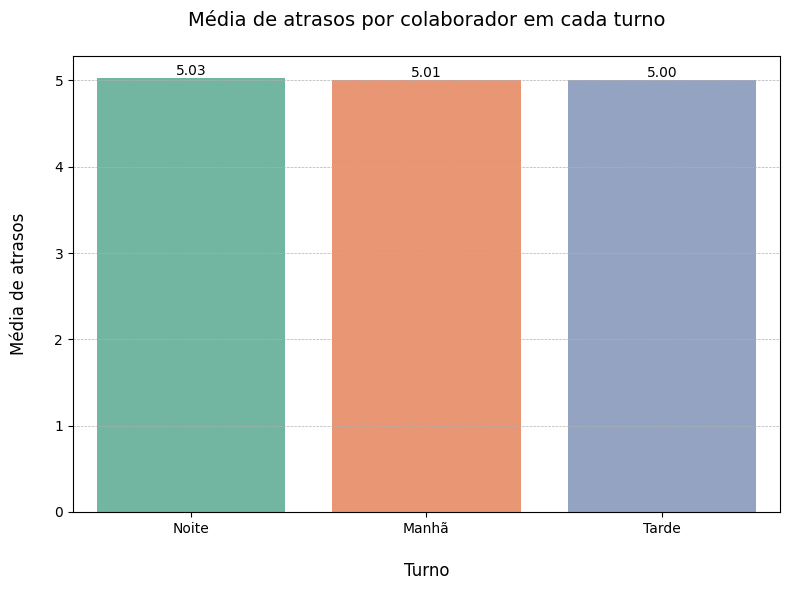

In [80]:
#Calcular o total de colaboradores √∫nicos por turno
total_colaboradores = df.groupby('Turno')['ID do Colaborador'].nunique()

#Calcular o total de atrasos por turno
total_atrasos = df.groupby('Turno')['Quantidade de Atrasos'].sum()

#Calcular a m√©dia de atrasos por colaborador em cada turno
media_atrasos_por_colaborador = (total_atrasos / total_colaboradores).sort_values(ascending=False)

#Visualiza√ß√£o da m√©dia de atrasos por turno
plt.figure(figsize=(8, 6))
plot = sns.barplot(
    x=media_atrasos_por_colaborador.index,
    y=media_atrasos_por_colaborador.values,
    palette='Set2'
)

#T√≠tulos e r√≥tulos
plot.set_title('M√©dia de atrasos por colaborador em cada turno\n', fontsize=14)
plot.set_xlabel('\nTurno', fontsize=12)
plot.set_ylabel('M√©dia de atrasos\n', fontsize=12)
plot.tick_params(axis='both', labelsize=10)

#Adiciona valores acima das barras
for p in plot.patches:
    plot.annotate(f'{p.get_height():.2f}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', fontsize=10)

plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

A diferen√ßa entre os turnos √© muito pequena, menos de 0.05 atrasos por colaborador, o que sugere que o turno, isoladamente, n√£o √© um fator determinante para atrasos.

##Performance vs. Horas Extras

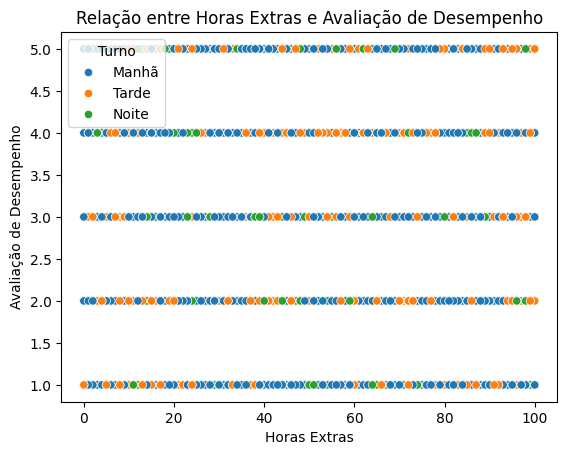

Horas Extras  Avalia√ß√£o de Desempenho
Horas Extras                 1.000000                 0.006991
Avalia√ß√£o de Desempenho      0.006991                 1.000000

In [82]:
sns.scatterplot(data=df, x='Horas Extras', y='Avalia√ß√£o de Desempenho', hue='Turno')
plt.title("Rela√ß√£o entre Horas Extras e Avalia√ß√£o de Desempenho")
plt.show()

# Correla√ß√£o
df[['Horas Extras', 'Avalia√ß√£o de Desempenho']].corr()

O gr√°fico de dispers√£o mostra uma distribui√ß√£o bem espalhada das avalia√ß√µes em todos os n√≠veis de horas extras, com avalia√ß√µes concentradas principalmente nas notas inteiras (de 1 a 5) o que confere com a base que temos.

N√£o h√° um padr√£o claro de correla√ß√£o visual sugerindo que pessoas com muitas horas extras podem ter tanto notas altas quanto baixas.

O crit√©rio de avalia√ß√£o de desempenho, nessa base, n√£o parece considerar ou depender da quantidade de horas extras feitas.


##Tempo m√©dio de promo√ß√£o

In [84]:
#Calcular o tempo para promo√ß√£o em anos
df['Tempo para Promo√ß√£o'] = (df['Data da √öltima Promo√ß√£o'] - df['Data de Admiss√£o']).dt.days / 365

#Filtrar apenas quem foi promovido (n√£o nulo)
promovidos = df[df['Tempo para Promo√ß√£o'].notna()]

#Tempo m√©dio para promo√ß√£o geral
tempo_promocao_geral = promovidos['Tempo para Promo√ß√£o'].mean()
print(f"‚è±Ô∏è Tempo m√©dio para promo√ß√£o (geral): {tempo_promocao_geral:.2f} anos")

#Tempo m√©dio para promo√ß√£o por faixa de desempenho
tempo_promocao_por_perf = promovidos.groupby('Avalia√ß√£o de Desempenho')['Tempo para Promo√ß√£o'].mean().sort_index()

print("\nüìà Tempo m√©dio para promo√ß√£o por desempenho:")
print(tempo_promocao_por_perf)

‚è±Ô∏è Tempo m√©dio para promo√ß√£o (geral): 4.61 anos

üìà Tempo m√©dio para promo√ß√£o por desempenho:
Avalia√ß√£o de Desempenho
1    4.646500
2    4.546127
3    4.554661
4    4.678925
5    4.637372
Name: Tempo para Promo√ß√£o, dtype: float64


A diferen√ßa de tempo entre notas baixas e altas √© muito pequena.
Em m√©dia, todos os colaboradores s√£o promovidos ap√≥s ~4.6 anos, independente do desempenho.

Isso pode indicar que o crit√©rio de promo√ß√£o n√£o est√° alinhado com a performance individual, o que √© um insight importante para RH ou lideran√ßa.

###Perman√™ncia, promo√ß√£o e performance por departamento

Tempo m√©dio de promo√ß√£o x Performance m√©dia
- **Hip√≥tese**: colaboradores com desempenho mais alto s√£o promovidos mais r√°pido.
- **Correla√ß√£o negativa esperada:** quanto maior o desempenho, menor o tempo m√©dio para promo√ß√£o.

Performance m√©dia x N√∫mero de promo√ß√µes.
- **Hip√≥tese**: departamentos com maior m√©dia de desempenho realizam mais promo√ß√µes.
- Pode indicar que os gestores reconhecem e recompensam bons desempenhos.

Tempo m√©dio de promo√ß√£o x N√∫mero de promo√ß√µes
- **Hip√≥tese**: quanto mais promo√ß√µes s√£o feitas, menor tende a ser o tempo m√©dio.
- Pode indicar processos de progress√£o de carreira mais √°geis.

In [87]:
#Calcular tempo (anos) desde admiss√£o at√© a √∫ltima promo√ß√£o
df['Tempo para Promo√ß√£o'] = (df['Data da √öltima Promo√ß√£o'] - df['Data de Admiss√£o']).dt.days / 365

#Tempo m√©dio para promo√ß√£o por departamento
tempo_medio_dep = df[df['Tempo para Promo√ß√£o'].notna()].groupby('Departamento')['Tempo para Promo√ß√£o'].mean()

#Quantidade de promo√ß√µes por departamento
promocoes_dep = df[df['Data da √öltima Promo√ß√£o'].notna()].groupby('Departamento').size()

#Performance m√©dia por departamento
perf_media_dep = df.groupby('Departamento')['Avalia√ß√£o de Desempenho'].mean()

#Combinar tudo
dep_analise = pd.DataFrame({
    'Tempo M√©dio (anos)': tempo_medio_dep,
    'Promo√ß√µes': promocoes_dep,
    'Performance M√©dia': perf_media_dep
}).fillna(0).sort_values('Tempo M√©dio (anos)', ascending=True)

print(dep_analise)

              Tempo M√©dio (anos)  Promo√ß√µes  Performance M√©dia
Departamento                                                  
Opera√ß√µes               4.563765       3493           2.981466
RH                      4.586443       3524           3.043382
TI                      4.586562       3465           3.000829
Financeiro              4.602739       3486           3.035420
Vendas                  4.622862       3436           2.980177
Marketing               4.630238       3387           2.992329
Jur√≠dico                4.700858       3377           3.009471


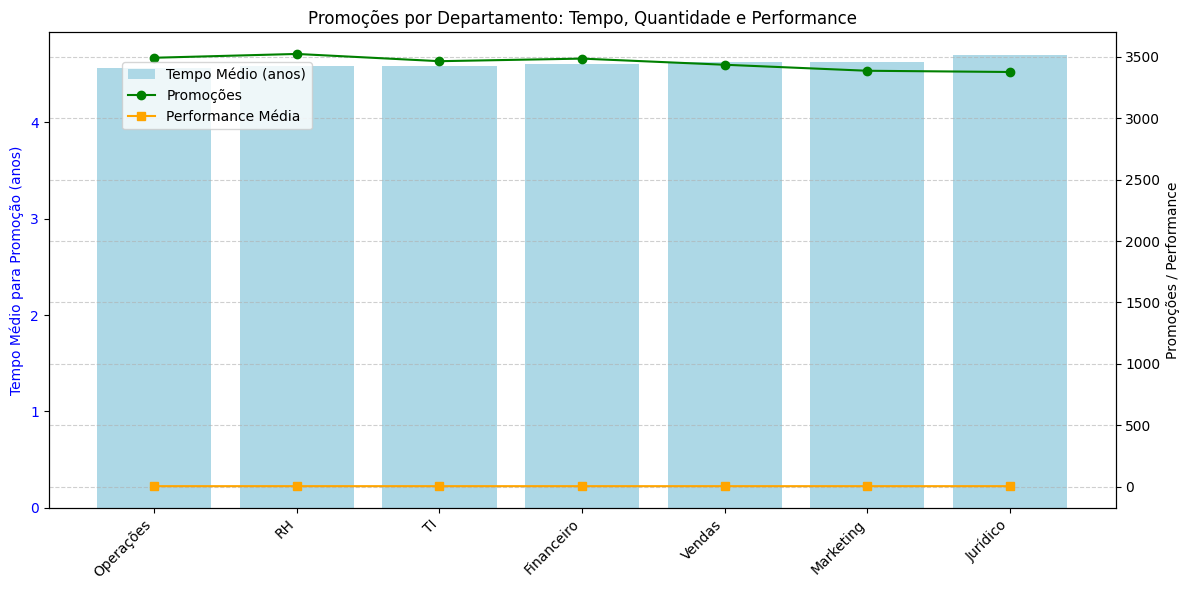

In [88]:
# Plot m√∫ltiplos eixos para facilitar leitura
fig, ax1 = plt.subplots(figsize=(12,6))

departamentos = dep_analise.index
tempo = dep_analise['Tempo M√©dio (anos)']
promocoes = dep_analise['Promo√ß√µes']
performance = dep_analise['Performance M√©dia']

# Barra: Tempo m√©dio
ax1.bar(departamentos, tempo, color='lightblue', label='Tempo M√©dio (anos)')
ax1.set_ylabel('Tempo M√©dio para Promo√ß√£o (anos)', color='blue')
ax1.set_xticklabels(departamentos, rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='blue')

# Eixo secund√°rio: Promo√ß√µes e Performance
ax2 = ax1.twinx()
ax2.plot(departamentos, promocoes, color='green', marker='o', label='Promo√ß√µes')
ax2.plot(departamentos, performance, color='orange', marker='s', label='Performance M√©dia')
ax2.set_ylabel('Promo√ß√µes / Performance', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Legenda
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.title('Promo√ß√µes por Departamento: Tempo, Quantidade e Performance')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

Mesmo com dados bastante uniformes podemos concluir que o **Jur√≠dico** √© o que mais demora em m√©dia para promover (**4,70 anos**), enquanto Opera√ß√µes promove ligeiramente mais r√°pido (**4,56 anos**).
Os departamentos de **RH** (3.524 promo√ß√µes) e **Opera√ß√µes** (3.493 promo√ß√µes) como os que mais promoveram.

Departamentos como Vendas e Opera√ß√µes t√™m m√©dias ligeiramente mais baixas (2,98), o que pode indicar necessidade de suporte ou desenvolvimento.

Os departamentos possuem cad√™ncias de promo√ß√£o semelhantes, mas o volume de promo√ß√µes e a qualidade do desempenho podem variar levemente.

O RH se destaca tanto em n√∫mero de promo√ß√µes quanto em desempenho m√©dio ‚Äî o que pode refletir boas pr√°ticas internas de desenvolvimento.

Marketing e Jur√≠dico t√™m o menor n√∫mero de promo√ß√µes e tempos m√©dios um pouco maiores ‚Äî o que pode ser analisado mais a fundo (restri√ß√µes de estrutura, crit√©rios de promo√ß√£o mais r√≠gidos, etc.).

### Sobre dados fict√≠cios e aus√™ncia de correla√ß√£o

√â super importante registrar que:

- **Nenhuma correla√ß√£o significativa tamb√©m √© insight!**
- Significa que vari√°veis testadas **n√£o t√™m rela√ß√£o linear relevante** no contexto atual
- Pode indicar dados simulados ou necessidade de outros tipos de an√°lise (n√£o linear, qualitativa, etc)
- Em apresenta√ß√£o, vale explicar isso para n√£o parecer que "n√£o fez an√°lise"


#Conclus√µes finais

##Rotatividade
- Aproximadamente 20% da for√ßa de trabalho foi desligada, mas n√£o h√° informa√ß√£o sobre o motivo (volunt√°rio ou involunt√°rio).

- A taxa de rotatividade se mant√©m alta e est√°vel ao longo do tempo, com leve varia√ß√£o entre faixas de tempo de casa.

- Departamentos com maior saldo positivo de admiss√µes: TI, RH e Opera√ß√µes.

- N√£o foram encontrados casos de ‚Äútroca intensa‚Äù (admiss√µes ‚âÖ demiss√µes) nos departamentos, sugerindo crescimento ou estabilidade, e n√£o reposi√ß√£o cont√≠nua.

## Admiss√µes e demiss√µes ao longo do tempo
- As admiss√µes se mant√™m em um patamar elevado e constante at√© recentemente.

- J√° as demiss√µes t√™m crescido continuamente, indicando uma poss√≠vel tend√™ncia de aumento no turnover nos √∫ltimos anos.


##Desempenho e demiss√µes
- A avalia√ß√£o m√©dia de desempenho dos demitidos se manteve em torno de 3.0 (escala de 1 a 5), com pouca varia√ß√£o ao longo do tempo.

- Isso sugere que as demiss√µes n√£o s√£o fortemente direcionadas por baixa performance, ou que a avalia√ß√£o n√£o discrimina bem o desempenho.

##Promo√ß√µes
- O tempo m√©dio at√© a promo√ß√£o √© de ~4,6 anos, com pouca diferen√ßa entre departamentos e faixas de desempenho.

- Departamentos com mais promo√ß√µes: RH, Opera√ß√µes e TI.

- A performance m√©dia dos promovidos tamb√©m n√£o apresenta grandes varia√ß√µes entre √°reas, sugerindo que promo√ß√µes seguem um ciclo de tempo, n√£o de performance.

##Gestores

- Foram identificados gestores com altas taxas de demiss√£o (>40% dos colaboradores admitidos).

- A maioria dos gestores concentra uma taxa de demiss√£o abaixo de 30%, mas ainda h√° dispers√£o significativa.

- Pode indicar diferen√ßas na gest√£o de pessoas ou contexto organizacional espec√≠ficos por √°rea.

## Carga Hor√°ria e Desempenho
- N√£o h√° correla√ß√£o relevante entre horas extras e avalia√ß√£o de desempenho (correla√ß√£o ‚âà 0.007).

- Isso mostra que trabalhar mais horas n√£o est√° associado a melhor performance, ao menos nos crit√©rios avaliados.

##Conclus√£o Final

A organiza√ß√£o apresenta padr√µes est√°veis de gest√£o de pessoas, com pol√≠ticas de b√¥nus e promo√ß√£o uniformes, por√©m pouco conectadas a desempenho. H√° uma tend√™ncia recente de aumento nas demiss√µes e redu√ß√£o nas admiss√µes, o que merece aten√ß√£o. A gest√£o de pessoas por alguns l√≠deres pode estar mais vulner√°vel, indicando espa√ßo para a√ß√µes espec√≠ficas por gestor ou departamento. A avalia√ß√£o de desempenho parece desconectada de vari√°veis comportamentais e operacionais (como atrasos ou horas extras), sugerindo poss√≠vel revis√£o dos crit√©rios avaliativos.